# Task 2

# Q1

In [2]:
#import the pandas library.
# pandas -> for data manipulation and analysis.

import pandas as pd

In [1]:
#Download the file from google drive.
!gdown --fuzzy https://drive.google.com/file/d/12u_T3ZSRkKwHM8msfDe9OdEmhZmvT6Eo/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=12u_T3ZSRkKwHM8msfDe9OdEmhZmvT6Eo
To: /content/Au_nanoparticle_dataset.csv
100% 2.43M/2.43M [00:00<00:00, 45.2MB/s]


In [3]:
# Read dataset
df = pd.read_csv('Au_nanoparticle_dataset.csv', index_col=0, encoding='latin')

In [4]:
df.head()

,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,R_diff,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
ID,,,,,,,,,,,,,,,,,,,,,
1,273,0.000025,1,1599,1014,585,2.710000e-26,15.5898,19.4516,3.8618,...,0,0,0,0,0,0,0,0,-5908.6345,343.4555
2,273,0.000025,2,1642,1034,608,2.780000e-26,15.3996,24.1755,8.7760,...,0,0,0,0,0,0,0,0,-6035.4034,384.8166
3,273,0.000025,3,4637,3365,1272,7.850000e-26,21.9199,31.0305,9.1106,...,0,0,0,0,0,0,0,0,-17330.1660,800.5040
4,273,0.000025,4,7189,5292,1897,1.220000e-25,23.2542,37.8795,14.6253,...,0,0,0,0,0,0,0,0,-26937.2010,1171.7890
5,273,0.000025,5,11004,8508,2496,1.860000e-25,27.1200,39.7614,12.6415,...,0,0,0,0,0,0,0,0,-41427.9010,1597.7390


In [10]:
# List of columns to keep
columns_to_keep = ['N_total', 'N_bulk', 'N_surface', 'R_avg']

# Filter the DataFrame
filtered_df = df[columns_to_keep]

#Q2

In [11]:
# Display the first 20 rows of the filtered DataFrame
filtered_df.head(20)

,N_total,N_bulk,N_surface,R_avg
ID,,,,
1,1599,1014,585,17.3706
2,1642,1034,608,17.6061
3,4637,3365,1272,25.3692
4,7189,5292,1897,29.7011
5,11004,8508,2496,34.2831
6,13375,10768,2607,36.6334
7,13795,11155,2640,37.0108
8,13947,11304,2643,37.1672
9,14020,11357,2663,37.2103


# Q3

In [14]:
# Step 5: Calculate descriptive statistics
mean_values = filtered_df.mean()
std_values = filtered_df.std()
quartiles = filtered_df.quantile([0.25, 0.5, 0.75])

In [20]:
# Display the results
print("Mean values:")
print(mean_values)
print("\nStandard deviation values:")
print(std_values)
print("\nQuartile values (25th, 50th, 75th percentiles):")
print(quartiles)

Mean values:
N_total      3476.786500
N_bulk       2521.550250
N_surface     955.236250
R_avg          20.654363
dtype: float64

Standard deviation values:
N_total      3679.286769
N_bulk       2976.232459
N_surface     721.870220
R_avg           7.610716
dtype: float64

Quartile values (25th, 50th, 75th percentiles):
      N_total   N_bulk  N_surface      R_avg
0.25   1061.0   618.75     437.00  15.160725
0.50   1867.0  1199.00     666.00  18.629250
0.75   4503.0  3183.00    1301.75  25.525125


#Q4

In [47]:
#import matplotlib
import matplotlib.pyplot as plt

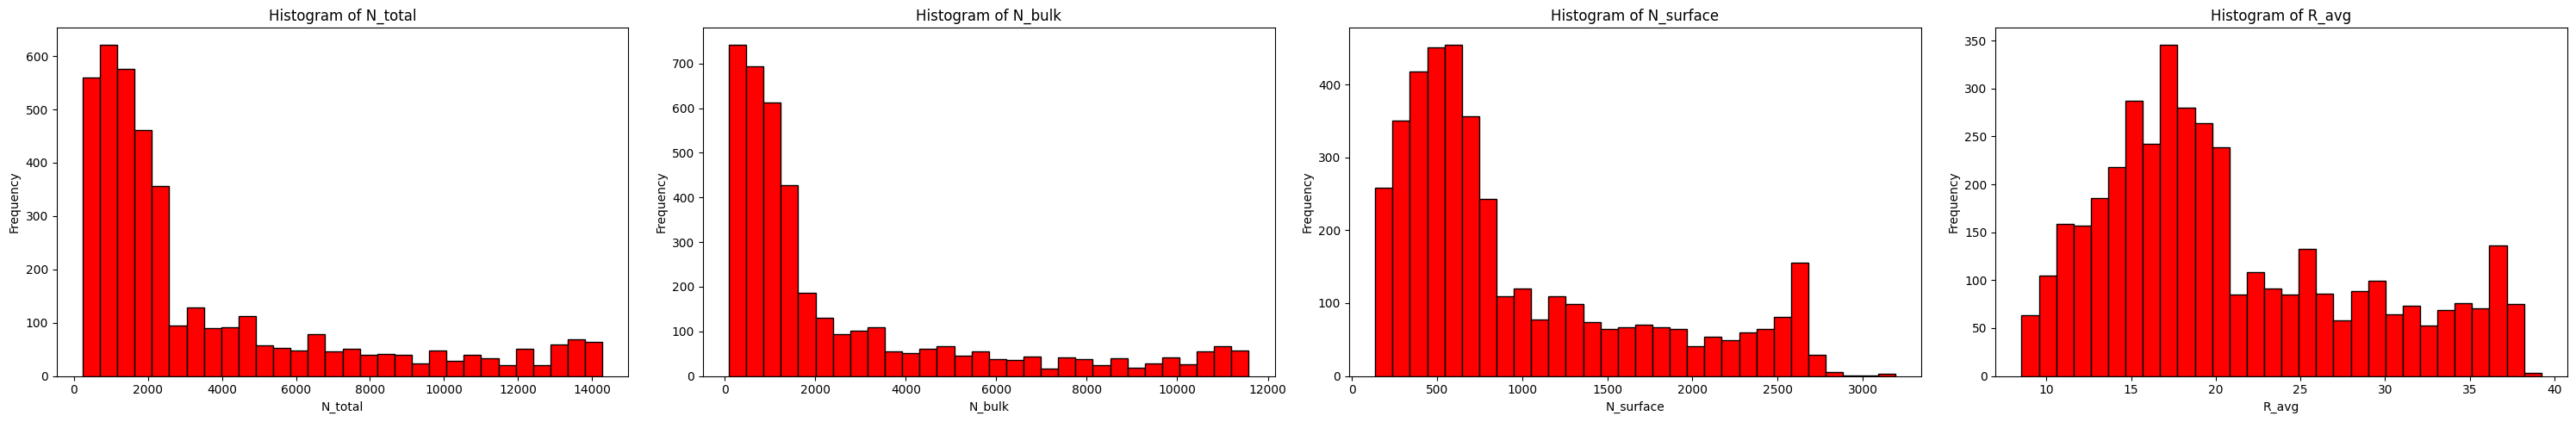

In [54]:
# Step 5: Plot the histograms in a 1x4 layout
fig, axes = plt.subplots(1, 4, figsize=(30, 5))

# Plot histogram for each feature
for ax, feature in zip(axes, columns_to_keep):
    ax.hist(filtered_df[feature], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#Q5

In [52]:
#import the seaborn library
# seaborn -> library based on matplotlib that provides a high-level interface.

import seaborn as sns

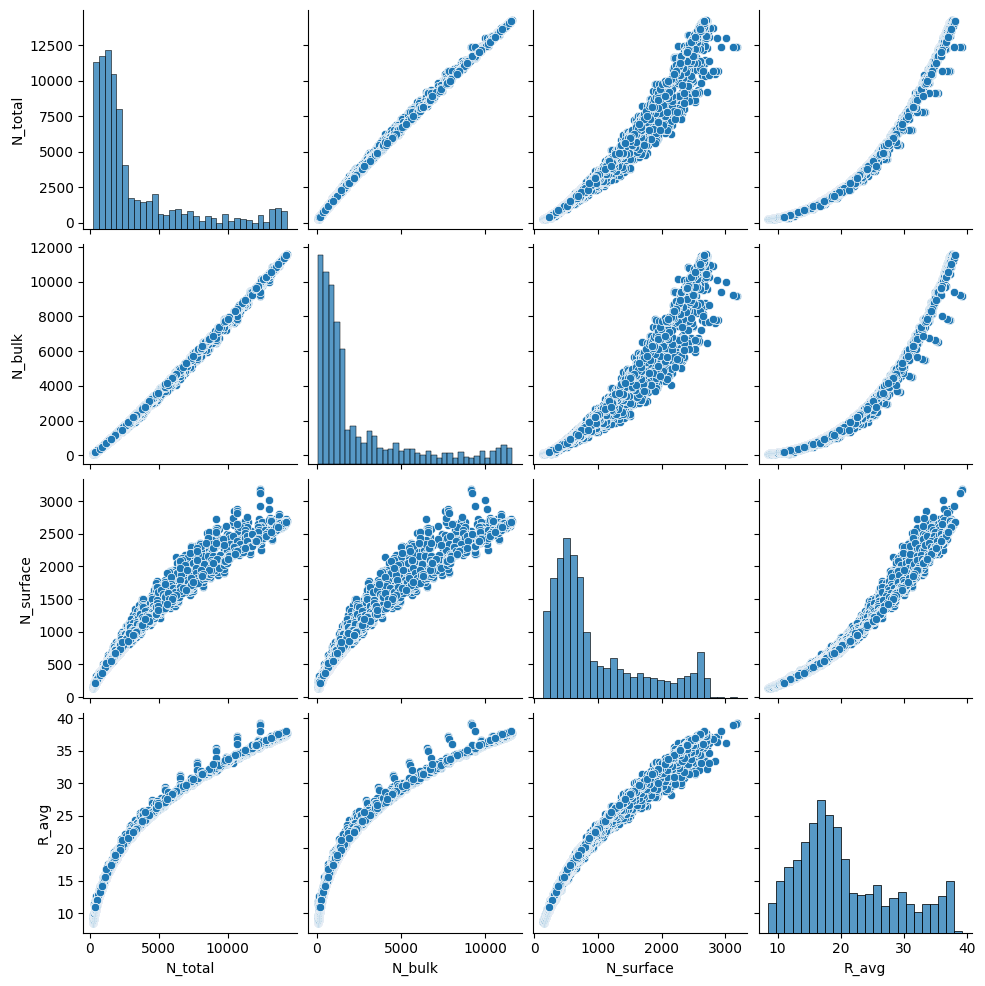

In [55]:
# Step 5: Visualize using pairplot
sns.pairplot(filtered_df)
plt.show()

#Q6

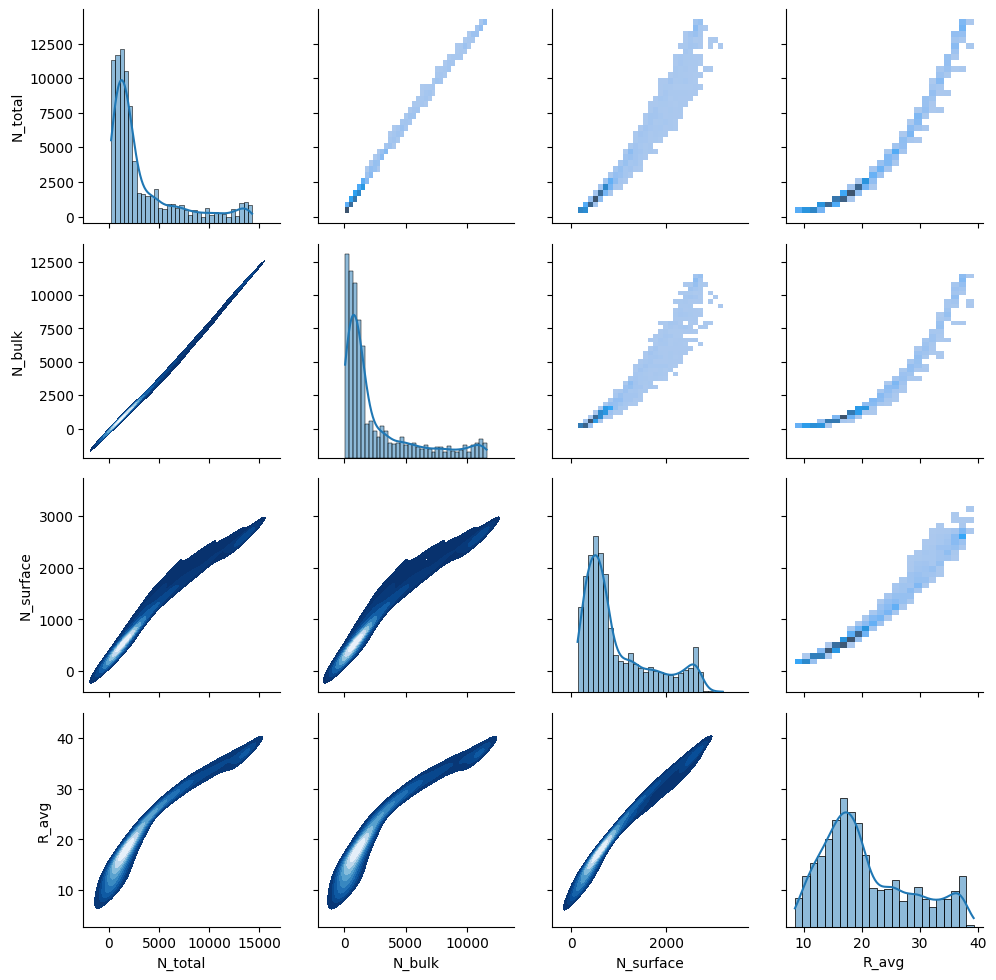

In [57]:
# Step 5: Create PairGrid
g = sns.PairGrid(filtered_df)

# Step 6: Map plots to the PairGrid
g.map_upper(sns.histplot)  # Bivariate histogram on the upper half
g.map_diag(sns.histplot, kde=True)  # Histogram with KDE on the diagonal
g.map_lower(sns.kdeplot, cmap="Blues_r", fill=True)  # Bivariate KDE plot on the lower half

# Step 7: Display the plot
plt.show()